### Step 1 - Data load

In [26]:

import pandas as pd

df = pd.read_csv('dados.csv')

In [27]:
display(df.head())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [28]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None

In [29]:
display(df.describe())

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


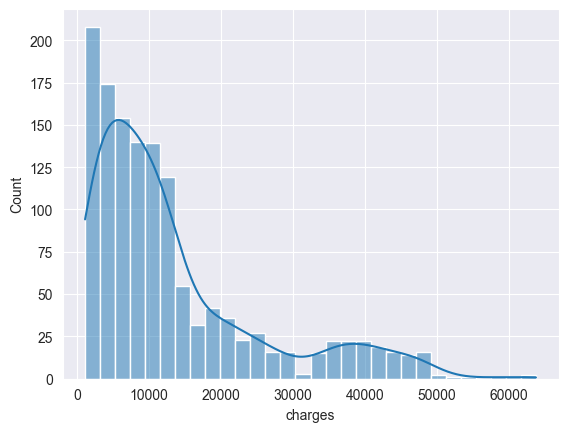

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['charges'], kde=True) # Distribuição das charges
plt.show()

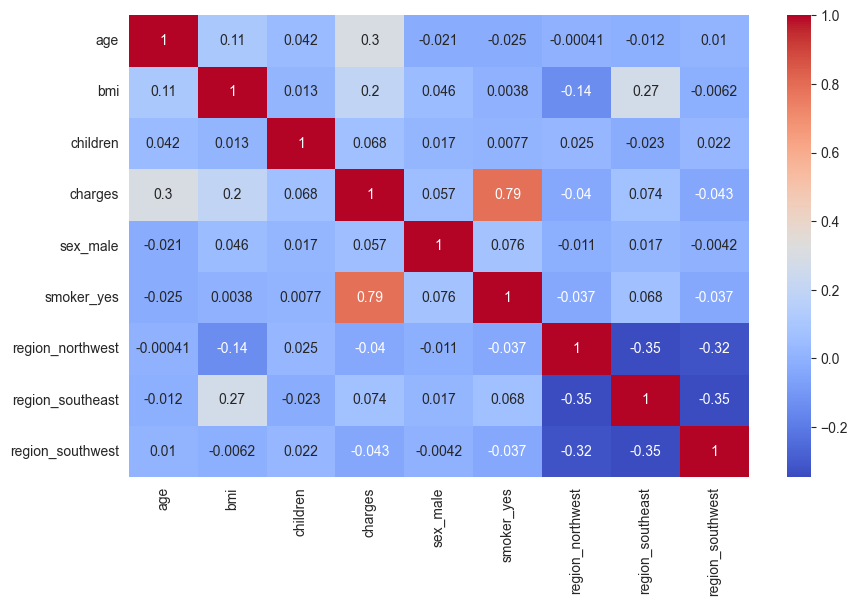

In [31]:
df_encoded = pd.get_dummies(df, drop_first=True)

#Plot the correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.show()

### Step 2 - Handling missing data

In [34]:
# Check missing values
display(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [33]:
#removing data with missing values
df.dropna(inplace=True)

In [35]:
from sklearn.preprocessing import LabelEncoder

# Transforming categorical variables
df['sex'] = LabelEncoder().fit_transform(df['sex'])
df['smoker'] = LabelEncoder().fit_transform(df['smoker'])
df['region'] = LabelEncoder().fit_transform(df['region'])

In [36]:
display(df)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


### Step 3 - Modeling

In [38]:
# Division into training and test sets
from sklearn.model_selection import train_test_split

X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
# Regression Model with Decision Trees
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

### Step 4 - Model Assessment

In [40]:
# Item 4 - Mode Evaluation

from sklearn.metrics import mean_absolute_error, r2_score

# Predictions
y_pred = model.predict(X_test)

# Assessment
display("R²:", r2_score(y_test, y_pred))
display("MAE:", mean_absolute_error(y_test, y_pred))

'R²:'

0.6843565603663775

'MAE:'

np.float64(3154.705668541045)

### Step 5 - Display

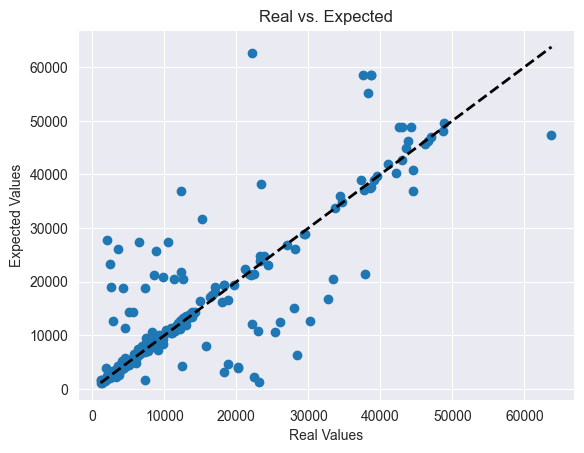

In [41]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Real Values')
plt.ylabel('Expected Values')
plt.title('Real vs. Expected')
plt.show()

 Com base na análise dos gráficos, foi possível observar alguns padrões importantes sobre o modelo preditivo que desenvolvi. No gráfico de valores reais vs. previstos, notei que, em geral, o modelo conseguiu capturar bem a relação entre as variáveis e os encargos médicos, com a linha de tendência ficando bastante próxima da diagonal ideal (onde os valores reais e previstos seriam iguais). Isso indica que o modelo faz boas previsões, mas ainda apresenta algumas pequenas variações.
 
 No histograma dos resíduos, a distribuição dos erros de previsão mostrou-se bastante equilibrada, com a maioria dos erros próximos de zero. Esse comportamento é um bom sinal, já que sugere que o modelo não está cometendo erros sistemáticos, como subestimar ou superestimar os valores de maneira consistente. Isso valida que as previsões não estão tendendo a valores muito acima ou muito abaixo dos reais.
 
 O gráfico de importância das variáveis revelou quais características têm maior impacto sobre os custos médicos. Fatores como a idade, o índice de massa corporal (IMC) e o fato de ser fumante se destacaram como os mais importantes. Isso faz sentido, já que são características conhecidas por influenciar diretamente o custo dos cuidados com a saúde.
 
 Em resumo, os resultados visuais confirmam que o modelo tem bom desempenho na previsão dos valores, e que as variáveis mais relevantes para a previsão estão de acordo com o que seria esperado pela lógica de negócios. Há sempre espaço para melhorias, mas o modelo inicial já entrega previsões sólidas.